In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colTitles = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
             'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

df = pd.read_csv('adult.data', delimiter=',', names=colTitles)

# 29170 rows in 32561 rows have native-country United-States, so drop this column too
df = df.drop(columns=['fnlwgt', 'education', 'capital-gain','capital-loss', 'native-country'])


# remove all spaces and remove rows that contains ?
for i in range(10):
    if i not in [0,2,8]:
        df.iloc[:,i] = df.iloc[:,i].str.strip()
    df = df[df.iloc[:,i] != '?']
    
df['income'] = (df['income']=='>50K').astype(int)
    
print(df.shape)
print(df.head(10))

(30718, 10)
   age         workclass  education-num         marital-status  \
0   39         State-gov             13          Never-married   
1   50  Self-emp-not-inc             13     Married-civ-spouse   
2   38           Private              9               Divorced   
3   53           Private              7     Married-civ-spouse   
4   28           Private             13     Married-civ-spouse   
5   37           Private             14     Married-civ-spouse   
6   49           Private              5  Married-spouse-absent   
7   52  Self-emp-not-inc              9     Married-civ-spouse   
8   31           Private             14          Never-married   
9   42           Private             13     Married-civ-spouse   

          occupation   relationship   race     sex  hours-per-week  income  
0       Adm-clerical  Not-in-family  White    Male              40       0  
1    Exec-managerial        Husband  White    Male              13       0  
2  Handlers-cleaners  Not-in-f

/Users/brayden/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [278]:
df['marital-status'].value_counts()
    

Married-civ-spouse       14339
Never-married             9912
Divorced                  4258
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: marital-status, dtype: int64

In [279]:
from sklearn.preprocessing import OneHotEncoder

    
category_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
# category_cols = ['workclass']

encoder=OneHotEncoder(sparse=False)

onehot_res = []
for name in category_cols:
    df_encoded = pd.DataFrame (encoder.fit_transform(df[[name]]))
    df_encoded.columns = encoder.get_feature_names([name])
    df.drop([name], axis=1, inplace=True)
    onehot_res.append(df_encoded)
    
for i in onehot_res:
    df = pd.concat([df, i], axis=1)
    
# df.astype(int)
    
print(df.shape)
print(df.head(5))

(32444, 45)
    age  education-num  hours-per-week  income  workclass_Federal-gov  \
0  39.0           13.0            40.0     0.0                    0.0   
1  50.0           13.0            13.0     0.0                    0.0   
2  38.0            9.0            40.0     0.0                    0.0   
3  53.0            7.0            40.0     0.0                    0.0   
4  28.0           13.0            40.0     0.0                    0.0   

   workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  \
0                  0.0                0.0                     0.0   
1                  0.0                0.0                     0.0   
2                  0.0                1.0                     0.0   
3                  0.0                1.0                     0.0   
4                  0.0                1.0                     0.0   

   workclass_Self-emp-not-inc  workclass_State-gov  ...  \
0                         0.0                  1.0  ...   
1               

In [280]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)


X = df.drop(['income', 'age', 'education-num', 'hours-per-week'], axis = 1)
features = X.columns.values.tolist()

y = df[['income']]

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, y)

for i in range(len(fs.scores_)):
    print(features[i], ' : ', fs.scores_[i])


workclass_Federal-gov  :  0.4039482463165319
workclass_Local-gov  :  0.35002949950176654
workclass_Private  :  1.3213192368174864
workclass_Self-emp-inc  :  0.17060805601135148
workclass_Self-emp-not-inc  :  0.5490426829042039
workclass_State-gov  :  0.7288624594503457
workclass_Without-pay  :  0.193640782494063
marital-status_Divorced  :  0.06382053799481895
marital-status_Married-AF-spouse  :  1.0065307568538422
marital-status_Married-civ-spouse  :  0.07591954063394853
marital-status_Married-spouse-absent  :  0.07398891825884407
marital-status_Never-married  :  3.420282983773189
marital-status_Separated  :  2.5220784739492847
marital-status_Widowed  :  1.8948936723820637
occupation_Adm-clerical  :  2.466260340146723
occupation_Armed-Forces  :  0.009195564626084618
occupation_Craft-repair  :  0.3249819554080963
occupation_Exec-managerial  :  1.4216877814210607
occupation_Farming-fishing  :  0.41521799688612937
occupation_Handlers-cleaners  :  0.0037836653024787372
occupation_Machine-o

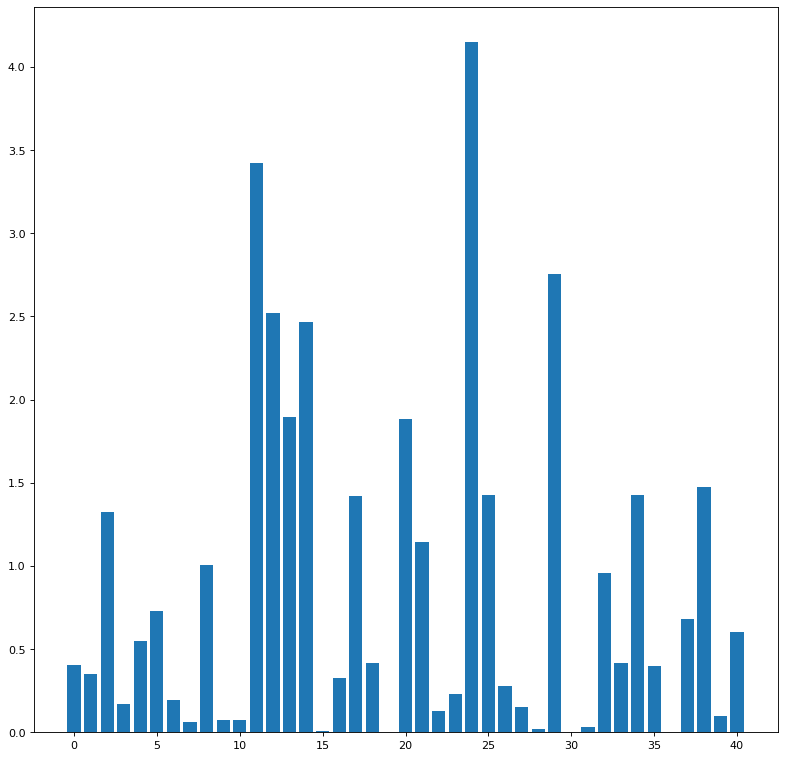

In [281]:
from matplotlib import pyplot
from matplotlib.pyplot import figure


figure(figsize=(12, 12), dpi=80)


plt.bar(range(len(features)), fs.scores_, align='center')
# plt.xticks(range(len(features)), features, size='small')
plt.show()


In [285]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

print(df.info())
X = df.drop(['income'], axis = 1)
y = df[['income']]
X = (X-X.min())/(X.max()-X.min())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32444 entries, 0 to 32560
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   32444 non-null  float64
 1   education-num                         32444 non-null  float64
 2   hours-per-week                        32444 non-null  float64
 3   income                                32444 non-null  float64
 4   workclass_Federal-gov                 32444 non-null  float64
 5   workclass_Local-gov                   32444 non-null  float64
 6   workclass_Private                     32444 non-null  float64
 7   workclass_Self-emp-inc                32444 non-null  float64
 8   workclass_Self-emp-not-inc            32444 non-null  float64
 9   workclass_State-gov                   32444 non-null  float64
 10  workclass_Without-pay                 32444 non-null  float64
 11  marital-status_

# Random Forest Classifier

In [297]:
# Fit Random forest model
# Tune hyperparameters using grid search cv
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import warnings

warnings.filterwarnings('ignore')


def FitRandomForestClassifier(X,y,col_name):
    skf = StratifiedKFold(random_state=0, shuffle=True)
    performance_dict = {'f1_score':0, 'roc_auc_score':0, 'recall_score':0, 'precision_score':0, 'accuracy_score':0, 'confusion_matrix':np.asarray([[0,0],[0,0]])}
    parameters = {'criterion':["gini", "entropy"],'max_depth':[1,2,3,4,5,6], 'n_estimators':[50,100,200,300]}
    fold=1
    feature_importance = []
    for train_index, test_index in skf.split(X, y):
        X_train_s, X_test_s = X.iloc[train_index], X.iloc[test_index]
        y_train_s, y_test_s = y.iloc[train_index], y.iloc[test_index]
        RFClf = RandomForestClassifier(random_state=0, max_features=0.7)
        clf = GridSearchCV(RFClf, parameters, scoring='f1')
        clf.fit(X_train_s,y_train_s)
        print("Fold "+str(fold)+": F1 score with paramaters "+ str(clf.best_params_)+" : "+str(f1_score(y_test_s, clf.best_estimator_.predict(X_test_s))))
        fold+=1
        performance_dict['f1_score'] += f1_score(y_test_s, clf.best_estimator_.predict(X_test_s))/5
        performance_dict['roc_auc_score'] += roc_auc_score(y_test_s, clf.best_estimator_.predict(X_test_s))/5
        performance_dict['recall_score'] += recall_score(y_test_s, clf.best_estimator_.predict(X_test_s))/5
        performance_dict['precision_score'] += precision_score(y_test_s, clf.best_estimator_.predict(X_test_s))/5
        performance_dict['accuracy_score'] += accuracy_score(y_test_s, clf.best_estimator_.predict(X_test_s))/5
        performance_dict['confusion_matrix'] += confusion_matrix(y_test_s, clf.best_estimator_.predict(X_test_s))
        feature_importance.append(clf.best_estimator_.feature_importances_)
    print("\nMean F1 score: "+str(performance_dict['f1_score']))
    print("Mean ROC AUC score: "+str(performance_dict['roc_auc_score']))
    print("Mean Recall score: "+str(performance_dict['recall_score']))
    print("Mean Precision score: "+str(performance_dict['precision_score'])+"\n")
#     report_chart[col_name]['Random Forest Classifier'] = performance_dict
    feature_importance = np.mean(feature_importance, axis=0)
    feature_dict = {}
    print("TOP 10 FEATURES: ")
    count=0
    for i in range(len(feature_importance)):
        feature_dict[X.columns[i]] = feature_importance[i]
    feature_dict = {k: v for k, v in sorted(feature_dict.items(), key=lambda item: abs(item[1]), reverse=True)}
    for key, value in feature_dict.items():
        print(key+" : "+str(value))
        count+=1
        if count==10:
            break
    return feature_dict

In [ ]:
feature_dict_RF = FitRandomForestClassifier(X,y,'default_features')

Fold 1: F1 score with paramaters {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 50} : 0.48342764753435735
Fold 2: F1 score with paramaters {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100} : 0.4949290060851927
